<a href="https://colab.research.google.com/github/405620294/classwork/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data
dataset from: https://www.kaggle.com/c/titanic/overview

In [47]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ans_df = pd.read_csv('gender_submission.csv')

# explore data

In [48]:
print(train_df.shape)
train_df.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
print(test_df.shape)
test_df.info()

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a8cd9b290>,
      dtype=object)

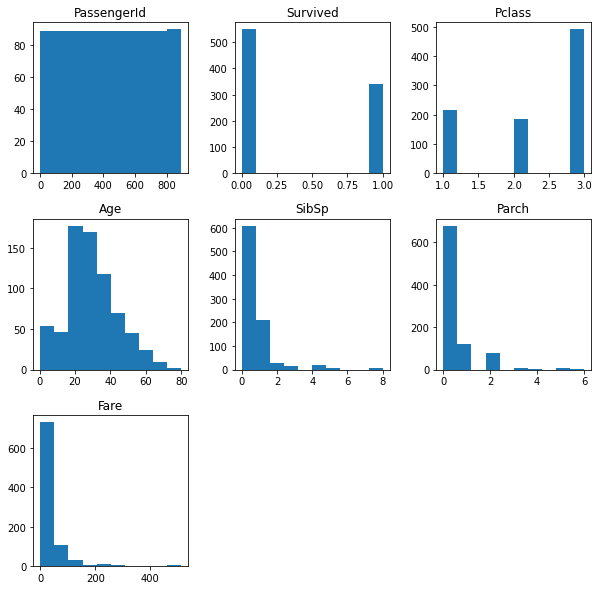

In [51]:
train_df.hist(figsize = (10,10), grid = False, layout = (3,3))

In [52]:
train_df['Ticket'].value_counts()

1601                7
347082              7
CA. 2343            7
347088              6
3101295             6
                   ..
349215              1
SOTON/OQ 3101317    1
3101265             1
2685                1
11769               1
Name: Ticket, Length: 681, dtype: int64

In [53]:
'''
  PassengerId
  Survived: 0 = No, 1 = Yes
  Pclass: Ticket class -- 1 = 1st, 2 = 2nd, 3 = 3rd
  * Name: title
  * Sex: 
  Age: 
  SibSp: # of siblings / spouses aboard the Titanic
  Parch: # of parents / children aboard the Titanic
  * Ticket: 
  Fare: 
  * Cabin: Cabin number
  * Embarked: Port of Embarkation -- C = Cherbourg, Q = Queenstown, S = Southampton
'''

'\n  PassengerId\n  Survived: 0 = No, 1 = Yes\n  Pclass: Ticket class -- 1 = 1st, 2 = 2nd, 3 = 3rd\n  * Name: title\n  * Sex: \n  Age: \n  SibSp: # of siblings / spouses aboard the Titanic\n  Parch: # of parents / children aboard the Titanic\n  * Ticket: \n  Fare: \n  * Cabin: Cabin number\n  * Embarked: Port of Embarkation -- C = Cherbourg, Q = Queenstown, S = Southampton\n'

# data preprocessing

In [54]:
df = pd.concat([train_df, test_df], ignore_index = True)
df.drop(columns= ['PassengerId', 'Survived'], inplace = True)
print(df.shape)

(1309, 10)


In [93]:
# check missing value
missing_df = df.isna().sum()
missing_df[ missing_df > 0 ].sort_values(ascending = False)

Cabin    1014
Title      14
dtype: int64

In [56]:
# filling missing valiue

# number
fill_number = df.median().drop('Pclass')
df.fillna(fill_number, inplace = True)

# category
most = df['Embarked'].value_counts().idxmax()
df['Embarked'].fillna(most, inplace = True)

In [57]:
# name >> title
# Flegenheim, Mrs. Alfred (Antoinette) >> Mrs
def get_title(s):
  title = s.split(',')[1].split('.')[0].strip()
  return title

title_list = df['Name'].apply(get_title)
title_list.isna().sum()  # no missimg
title_list = title_list.value_counts()

def change_name(s):
  title = s.split(',')[1].split('.')[0].strip()
  if title in title_list[:7].index:
    return title
  else:
    return None

df['Title'] = df['Name'].apply(change_name)
df.drop(columns = 'Name', inplace = True)

In [92]:
title_list[:7]

Mr        757
Miss      260
Mrs       197
Master     61
Dr          8
Rev         8
Col         4
Name: Name, dtype: int64

In [59]:
# creat new column: Family = SibSp + Parch
df['Family'] = df['SibSp'] + df['Parch']

In [60]:
# ticket >> share same ticket number
ticket_count = df['Ticket'].value_counts()
def change_ticket(s):
  return ticket_count[s]
df['Ticket'] = df['Ticket'].apply(change_ticket)

In [61]:
# cabin: 1014 missing value  # NaN
# D33 >> D
def change_cabin(s):
  if pd.isna(s):
    return None
  else:
    return s.strip()[0]
df['Cabin'] = df['Cabin'].apply(change_cabin)

In [62]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,3,male,22.0,1,0,1,7.2500,None,S,Mr,1
1,1,female,38.0,1,0,2,71.2833,C,C,Mrs,1
2,3,female,26.0,0,0,1,7.9250,None,S,Miss,0
3,1,female,35.0,1,0,2,53.1000,C,S,Mrs,1
4,3,male,35.0,0,0,1,8.0500,None,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,28.0,0,0,1,8.0500,None,S,Mr,0
1305,1,female,39.0,0,0,3,108.9000,C,C,None,0
1306,3,male,38.5,0,0,1,7.2500,None,S,Mr,0
1307,3,male,28.0,0,0,1,8.0500,None,S,Mr,0


In [63]:
# one hot encoding
preprocessed_df = pd.get_dummies(df)
preprocessed_df.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Col,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,3,22.0,1,0,1,7.2500,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,38.0,1,0,2,71.2833,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,3,26.0,0,0,1,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,1,35.0,1,0,2,53.1000,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,3,35.0,0,0,1,8.0500,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


# data split

In [64]:
x_train = preprocessed_df[:len(train_df)]
y_train = train_df['Survived']
x_test = preprocessed_df[len(train_df):]
print('x_train.shape', x_train.shape, 'y_train.shape', y_train.shape, 'x_test.shape', x_test.shape)

x_train.shape (891, 27) y_train.shape (891,) x_test.shape (418, 27)


# training model

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_clf = RandomForestClassifier()

params = {'n_estimators' : range(30, 53, 2), 
      'max_depth' : range(5, 7)}
grid_search = GridSearchCV(rf_clf, params, cv=10, n_jobs=-1, scoring='neg_log_loss')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 34}

In [66]:
rf_clf = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'],
                  max_depth = grid_search.best_params_['max_depth'])
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=34,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# envaluating

In [67]:
pre = rf_clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(ans_df['Survived'], pre)

0.9425837320574163

In [68]:
importances = pd.DataFrame(rf_clf.feature_importances_,
        columns=['importances'],
        index=x_train.columns).sort_values(by = 'importances', ascending=False)
importances

,importances
Sex_female,0.199211
Sex_male,0.148510
Title_Mr,0.132951
Pclass,0.099355
Fare,0.086951
Age,0.069240
Family,0.049024
Title_Miss,0.046402
Ticket,0.038632
SibSp,0.024951


In [69]:
# Q：因為類別欄位因為做了one hot enccodimg而有不同特徵重要性，但他們其實是同一個欄位？
def process_columns(s):
  return s.split('_')[0]

index_series = pd.Series(importances.index).apply(process_columns)
importances.index = index_series
importances = importances.groupby(by = importances.index).sum().sort_values(by = 'importances', ascending=False)

# visualization

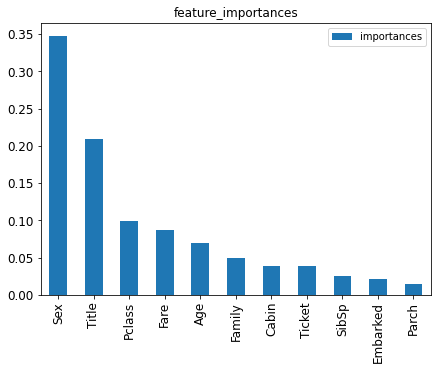

In [84]:
importances.plot(kind= 'bar',
        figsize = (7,5),
        title = 'feature_importances',
        fontsize = 12)

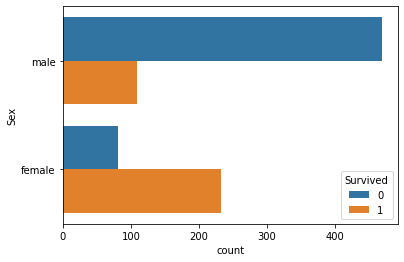

In [88]:
import seaborn as sns
sns.countplot(y=train_df['Sex'], hue=train_df['Survived'])

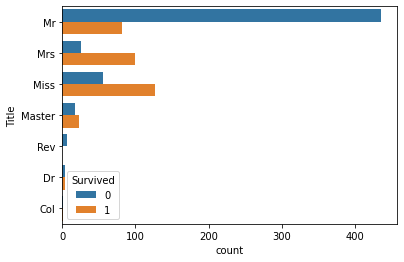

In [89]:
sns.countplot(y=df[:len(train_df)]['Title'], hue=train_df['Survived'])

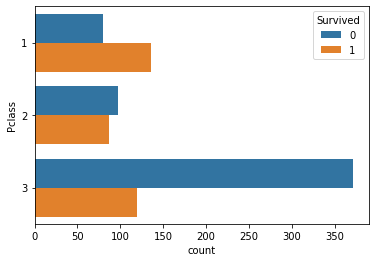

In [91]:
sns.countplot(y=train_df['Pclass'], hue=train_df['Survived'])